# Pandas

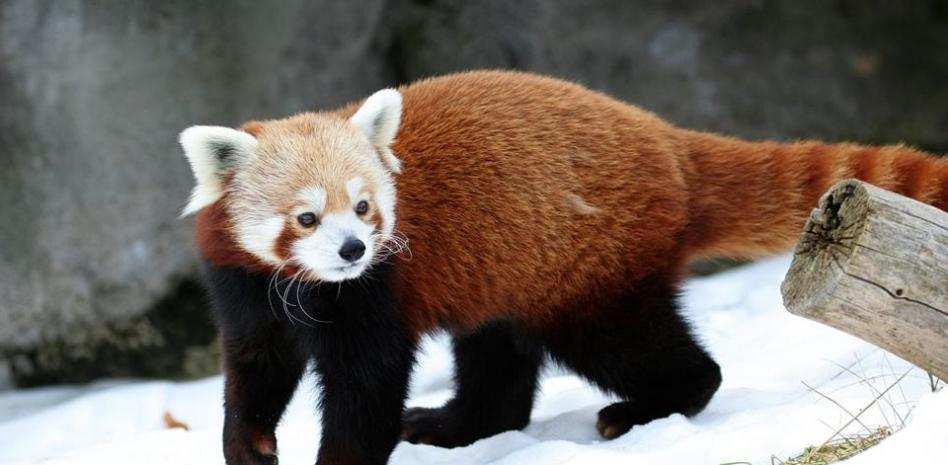

[El mejor tutorial de Pandas](https://www.youtube.com/watch?v=5JnMutdy6Fw&t=22s)


*   [Github](https://github.com/brandon-rhodes/pycon-pandas-tutorial)




Numpy es una librería con estructuras de datos y herramientas de manipulación de datos diseñadas para hacer la limpieza y el análisis de datos rápio y sencillo. Está construído sobre NumPy, comparte mucha de su funcionalidad y estilo programático.  


Al igual que usamos `np` como alias para numpy, `pd` sera el alias que usaremos para Pandas

In [ ]:
import pandas as pd
import numpy as np

## Series

In [ ]:
s1 = pd.Series(['0', '1', '2', '3'])
s1


0    0
1    1
2    2
3    3
dtype: object

In [ ]:
# Los
s2 = pd.Series([4, 5, 6, 7])
s2


0    4
1    5
2    6
3    7
dtype: int64

In [ ]:
# Podemos crear series a partir a ndarrays, por lo que tenemos acceso a la 
#   funcionalidad de creacion de datos de numpy
a3 = np.arange(4, 8)
s3 = pd.Series(a3)
s3


0    4
1    5
2    6
3    7
dtype: int64

In [ ]:
# Pandas tambien tiene funcionalidad de creacion de datos, por ejemplo podemos
#   hacer un indice con un rango de datos usando `pd.date_range` 
dates = pd.date_range(start='2021', periods=4, freq='M')
dates

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30'], dtype='datetime64[ns]', freq='M')

In [ ]:
a3_indexed = pd.Series(a3, index=dates)
a3_indexed

2021-01-31    4
2021-02-28    5
2021-03-31    6
2021-04-30    7
Freq: M, dtype: int64

## DataFrames

### Crear DataFrames

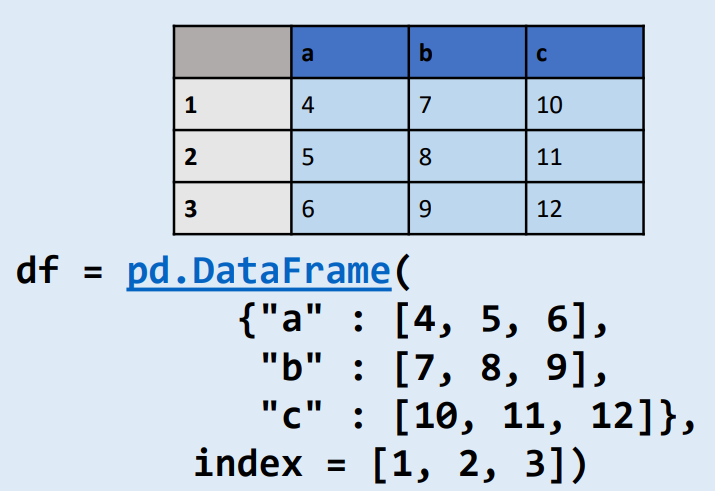

In [ ]:
df1 = pd.DataFrame(np.random.randn(4, 3), index=dates, columns=['A', 'B', 'C'])
df1

,A,B,C
2021-01-31,-0.897506,-0.393026,-0.132035
2021-02-28,0.339296,0.068874,-0.402907
2021-03-31,1.103742,2.561542,-1.362356
2021-04-30,1.124938,-1.106030,1.597683


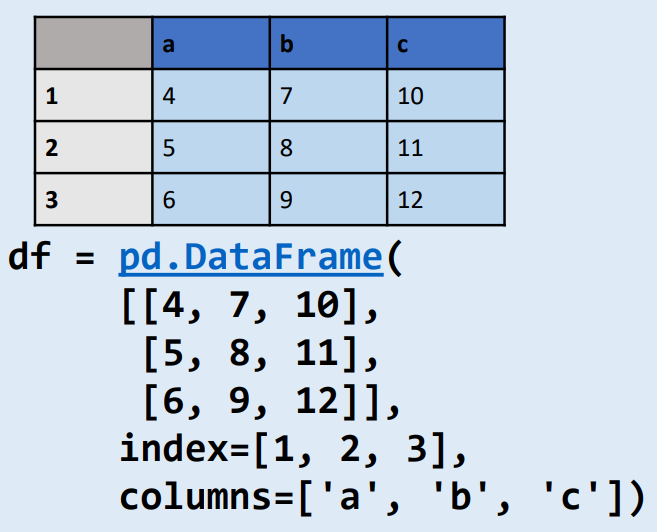

In [ ]:
df2 = pd.DataFrame({
  "A": 1.0,
  "B": s1,
  "C": s2,
  "D": s3,
  "E": "foo"})
df2.index = dates
df2

,A,B,C,D,E
2021-01-31,1.0,0,4,4,foo
2021-02-28,1.0,1,5,5,foo
2021-03-31,1.0,2,6,6,foo
2021-04-30,1.0,3,7,7,foo


In [ ]:
df2.dtypes

A    float64
B     object
C      int64
D      int64
E     object
dtype: object

### Ver datos

In [ ]:
dates = pd.date_range(start='2022-01', periods=10, freq='D')
df = pd.DataFrame(
    np.random.random((10, 3)), 
    index=dates, 
    columns = ["A", "B", "C"])


#### Métodos básicos

`.head()` selecciona los primeros 5 elementos

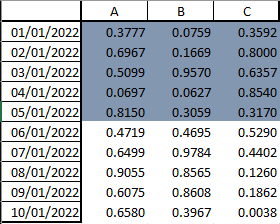

In [ ]:
df.head()

,A,B,C
2022-01-01,0.377707,0.075938,0.359213
2022-01-02,0.696667,0.166881,0.799954
2022-01-03,0.509899,0.956965,0.635724
2022-01-04,0.069732,0.062708,0.853981
2022-01-05,0.815046,0.305877,0.316991


`.tail()` selecciona los últimos 5 elementos  
`.tail(n)` selecciona los ultimos n elementos  
por ejemplo, `.tail(2)` selecciona los ultimos 2 elementos  

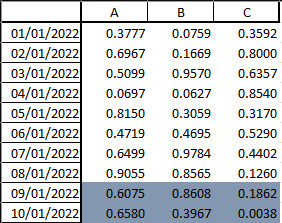




In [ ]:
df.tail(2)

,A,B,C
2022-01-09,0.607527,0.860769,0.186167
2022-01-10,0.658047,0.396701,0.003804


`.index` extrae el indice de la tabla  

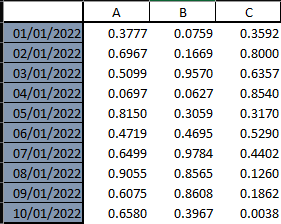

In [ ]:
df.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10'],
              dtype='datetime64[ns]', freq='D')

`.columns` extrae las columnas de la tabla  
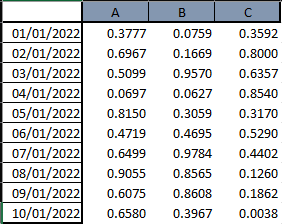

In [ ]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [ ]:
# Es posible convertir un DataFrame en un ndarray

df.to_numpy()
# Notese como se pierden las columnas y los indices

array([[0.3777068 , 0.07593816, 0.35921286],
       [0.69666735, 0.16688057, 0.79995398],
       [0.50989947, 0.9569653 , 0.63572415],
       [0.06973185, 0.0627076 , 0.85398099],
       [0.81504573, 0.30587737, 0.31699126],
       [0.47187352, 0.46952598, 0.52898292],
       [0.64993582, 0.97838722, 0.4401933 ],
       [0.90554289, 0.85646558, 0.12600684],
       [0.60752673, 0.86076859, 0.18616686],
       [0.6580469 , 0.39670106, 0.00380403]])

`.T` nos permite transponer un DataFrame.  
Las columnas se convierten en indices, los indices en columnas  

In [ ]:
df.T

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10
A,0.377707,0.696667,0.509899,0.069732,0.815046,0.471874,0.649936,0.905543,0.607527,0.658047
B,0.075938,0.166881,0.956965,0.062708,0.305877,0.469526,0.978387,0.856466,0.860769,0.396701
C,0.359213,0.799954,0.635724,0.853981,0.316991,0.528983,0.440193,0.126007,0.186167,0.003804


Usando `[]` podemos acceder a la informacion contenida en alguna columna.  
`.<nombre_columna>` tambien funciona   

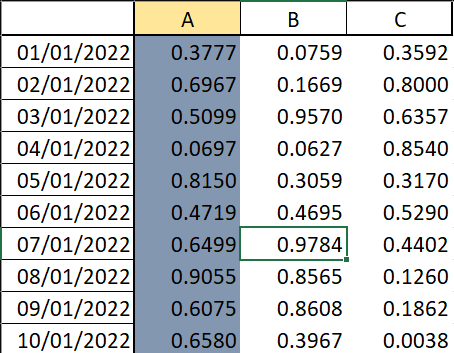

In [ ]:
df["A"]

2022-01-01    0.377707
2022-01-02    0.696667
2022-01-03    0.509899
2022-01-04    0.069732
2022-01-05    0.815046
2022-01-06    0.471874
2022-01-07    0.649936
2022-01-08    0.905543
2022-01-09    0.607527
2022-01-10    0.658047
Freq: D, Name: A, dtype: float64

In [ ]:
df.A

2022-01-01    0.377707
2022-01-02    0.696667
2022-01-03    0.509899
2022-01-04    0.069732
2022-01-05    0.815046
2022-01-06    0.471874
2022-01-07    0.649936
2022-01-08    0.905543
2022-01-09    0.607527
2022-01-10    0.658047
Freq: D, Name: A, dtype: float64

`[[<col_1>, <col_2>, ...]]`  Nos permite seleccionar mas de una columna a la vez.  
Notar que pasamos una lista con el nombre de las columnas.  
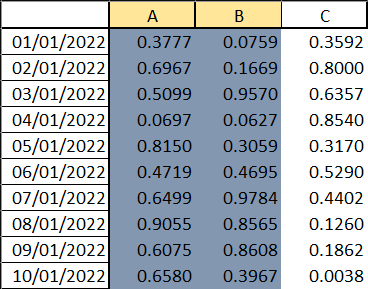

In [ ]:
df[['A', 'B']]

,A,B
2022-01-01,0.377707,0.075938
2022-01-02,0.696667,0.166881
2022-01-03,0.509899,0.956965
2022-01-04,0.069732,0.062708
2022-01-05,0.815046,0.305877
2022-01-06,0.471874,0.469526
2022-01-07,0.649936,0.978387
2022-01-08,0.905543,0.856466
2022-01-09,0.607527,0.860769
2022-01-10,0.658047,0.396701


Si en vez de pasar nombres de columnas al corchete `df[]`, le pasamos numeros, vamos a obtener las filas con la posicion indicada.  
Funciona rango de posiciones `df[ini:fin]`  
Funciona rango de indices `df[i_ini:i_fin]`  

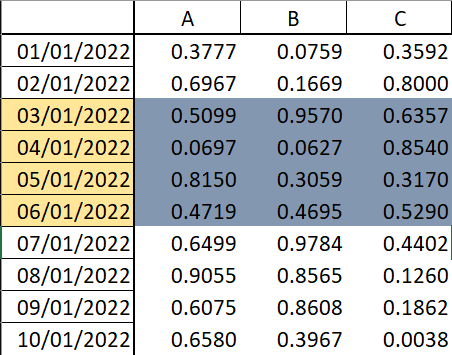

In [ ]:
df[2:6]

,A,B,C
2022-01-03,0.509899,0.956965,0.635724
2022-01-04,0.069732,0.062708,0.853981
2022-01-05,0.815046,0.305877,0.316991
2022-01-06,0.471874,0.469526,0.528983


In [ ]:
df['2022-01-03':'2022-01-06']

,A,B,C
2022-01-03,0.509899,0.956965,0.635724
2022-01-04,0.069732,0.062708,0.853981
2022-01-05,0.815046,0.305877,0.316991
2022-01-06,0.471874,0.469526,0.528983


#### `.loc` Seleccionar por etiqueta

In [ ]:
df.loc['2022-01-01']

A    0.712884
B    0.293031
C    0.678281
Name: 2022-01-01 00:00:00, dtype: float64

In [ ]:
df.loc[dates[1]]

A    0.267094
B    0.240199
C    0.807316
Name: 2022-01-02 00:00:00, dtype: float64

In [ ]:
df.loc[:, ["A", "B"]]

,A,B
2022-01-01,0.712884,0.293031
2022-01-02,0.267094,0.240199
2022-01-03,0.752057,0.007545
2022-01-04,0.057214,0.915758
2022-01-05,0.017709,0.433316
2022-01-06,0.864587,0.926790
2022-01-07,0.313620,0.958093
2022-01-08,0.016969,0.086303
2022-01-09,0.253159,0.376122
2022-01-10,0.716776,0.082248


In [ ]:
df.loc[dates[0:4], ["C", "B"]]

,C,B
2022-01-01,0.678281,0.293031
2022-01-02,0.807316,0.240199
2022-01-03,0.388339,0.007545
2022-01-04,0.801387,0.915758


In [ ]:
df.loc[dates[0], "A"]

0.7128838197531561

#### `.iloc` Seleccionar por posición 

In [ ]:
df.iloc[0]

A    0.712884
B    0.293031
C    0.678281
Name: 2022-01-01 00:00:00, dtype: float64

In [ ]:
df.iloc[3:5, 0:2]

,A,B
2022-01-04,0.057214,0.915758
2022-01-05,0.017709,0.433316


In [ ]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2022-01-02,0.267094,0.807316
2022-01-03,0.752057,0.388339
2022-01-05,0.017709,0.060947


In [ ]:
df.iloc[1:3, :]

,A,B,C
2022-01-02,0.267094,0.240199,0.807316
2022-01-03,0.752057,0.007545,0.388339


In [ ]:
df.iloc[:, 1:3]

,B,C
2022-01-01,0.293031,0.678281
2022-01-02,0.240199,0.807316
2022-01-03,0.007545,0.388339
2022-01-04,0.915758,0.801387
2022-01-05,0.433316,0.060947
2022-01-06,0.926790,0.410870
2022-01-07,0.958093,0.572606
2022-01-08,0.086303,0.454513
2022-01-09,0.376122,0.095115
2022-01-10,0.082248,0.603043


In [ ]:
df.iloc[1, 1]

0.24019933083705236

#### Indices booleanos (i.e. como filtrar un df)

In [ ]:
df[df["A"] > 0.5]

,A,B,C
2022-01-01,0.712884,0.293031,0.678281
2022-01-03,0.752057,0.007545,0.388339
2022-01-06,0.864587,0.926790,0.410870
2022-01-10,0.716776,0.082248,0.603043


In [ ]:
df[df > 0.5]

,A,B,C
2022-01-01,0.712884,NaN,0.678281
2022-01-02,NaN,NaN,0.807316
2022-01-03,0.752057,NaN,NaN
2022-01-04,NaN,0.915758,0.801387
2022-01-05,NaN,NaN,NaN
2022-01-06,0.864587,0.926790,NaN
2022-01-07,NaN,0.958093,0.572606
2022-01-08,NaN,NaN,NaN
2022-01-09,NaN,NaN,NaN
2022-01-10,0.716776,NaN,0.603043


### Modificar DataFrames

In [ ]:
dates = pd.date_range(start='2022-01', periods=10, freq='D')
df = pd.DataFrame(
    np.random.random((10, 3)), 
    index=dates, 
    columns = ["A", "B", "C"])


#### Modificar columnas e indices

In [ ]:
df.columns = [c.lower() for c in df.columns]
df.head(3)

,a,b,c
2022-01-01,0.897513,0.482819,0.950786
2022-01-02,0.282217,0.033862,0.221988
2022-01-03,0.518479,0.703432,0.302682


In [ ]:
df.index = [i.day_name() + " " + str(i.day) for i in df.index]
df.head(3)

,a,b,c
Saturday 1,0.897513,0.482819,0.950786
Sunday 2,0.282217,0.033862,0.221988
Monday 3,0.518479,0.703432,0.302682


#### Agregar columnas

#### Modificar datos de columnas

#### Eliminar filas y columnas

In [ ]:
df = df.drop('a', axis='columns')
df.head(3)

,b,c
Saturday 1,0.482819,0.950786
Sunday 2,0.033862,0.221988
Monday 3,0.703432,0.302682


In [ ]:
df = df.drop('Saturday 1', axis='index')
df.head(3)

,b,c
Sunday 2,0.033862,0.221988
Monday 3,0.703432,0.302682
Tuesday 4,0.298462,0.648247


#### Modificar valores

#### Modificar valores condicionalmente

#### Ordenar y rankear

### Aritmetica y análisis básico

#### Aritmética

#### Estadísticas descriptivas

#### Valores únicos, conteos y membresías